In [63]:
import os, time, math
import math
from math import sqrt
import numpy as np
import pandas as pd
import seaborn as sns
from keras.layers import Dense ,Dropout,BatchNormalization
from keras.models import Model
#from keras.optimizers import Adam
from keras.metrics import RootMeanSquaredError
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
%matplotlib inline
from matplotlib import pyplot as plt
from pprint import pprint
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingClassifier
from sklearn import linear_model, tree, ensemble
import sklearn.metrics as metrics 
from matplotlib import pyplot
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import statsmodels.api as sm
#from sklearn.metrics import mean_absolute_percentage_error
import xgboost as xgb
from xgboost import XGBRegressor
import math
from tune_sklearn import TuneGridSearchCV
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingClassifier
from sklearn import linear_model, tree, ensemble

In [64]:
# Helper Function
def rmse(predictions, targets):
    differences = predictions - targets                       #the DIFFERENCEs.
    differences_squared = differences ** 2                    #the SQUAREs of ^
    mean_of_differences_squared = differences_squared.mean()  #the MEAN of ^
    rmse_val = np.sqrt(mean_of_differences_squared)           #ROOT of ^
    return rmse_val

def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f}.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    return accuracy

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Run Bike RF model for iputation

In [79]:
bdata0=pd.read_csv('C:/UC Berkeley Project Backup/AT Census/Lindsey _QA/QC Article Analysis/Variables/RF_Imputation_model_data/bike_imputation_model_data.csv')
bdata0.head()

,Unnamed: 0.1,Unnamed: 0_x,ID,year,month,AASHTO_MADT,latitude,longitude,geometry,min_dist_to_CBD,...,Bike Lane,Cycle Track,Trail,cycleway,secondary,tertiary,primary,residential,service,trunk
0,0,0.0,671,2018,1,65.478571,37.79116,-122.45944,POLYGON ((-122.45030116607526 37.7911177158698...,5.15385,...,0,0,0,0,0,0,0,0,0,0
1,1,1.0,671,2018,2,60.928571,37.79116,-122.45944,POLYGON ((-122.45030116607526 37.7911177158698...,5.15385,...,0,0,0,0,0,0,0,0,0,0
2,2,2.0,671,2018,3,48.907143,37.79116,-122.45944,POLYGON ((-122.45030116607526 37.7911177158698...,5.15385,...,0,0,0,0,0,0,0,0,0,0
3,3,3.0,671,2018,4,52.942857,37.79116,-122.45944,POLYGON ((-122.45030116607526 37.7911177158698...,5.15385,...,0,0,0,0,0,0,0,0,0,0
4,4,4.0,671,2018,5,64.071429,37.79116,-122.45944,POLYGON ((-122.45030116607526 37.7911177158698...,5.15385,...,0,0,0,0,0,0,0,0,0,0


,Unnamed: 0.1,Unnamed: 0_x,ID,year,month,AASHTO_MADT,latitude,longitude,geometry,min_dist_to_CBD,...,Bike Lane,Cycle Track,Trail,cycleway,secondary,tertiary,primary,residential,service,trunk


In [80]:
bdata0.columns

Index(['Unnamed: 0.1', 'Unnamed: 0_x', 'ID', 'year', 'month', 'AASHTO_MADT',
       'latitude', 'longitude', 'geometry', 'min_dist_to_CBD',
       'Commercial Area ', 'Distance to commercial area', 'retail Area ',
       'Distance to retail area', 'industrial Area ',
       'Distance to industrial area', 'residential Area ',
       'Distance to residential area', 'grass Area ', 'Distance to grass area',
       'forest Area ', 'Distance to forest area', 'education Area ',
       'Distance to education area', 'institutional Area ',
       'Distance to institutional area', 'water Area',
       'Distance to water area', 'park Area ', 'Distance to Park Center',
       'School', 'min_dist_to_school', 'college', 'min_dist_to_college',
       'University', 'min_dist_to_university', 'pct_white',
       'pct_African_American', 'pct_male', 'pct_female', 'Student Access',
       'pct_at_least_college_education', 'HH_density', 'Median_HH_income',
       'population_density', 'Median Age', 'employme

In [83]:
# lets keep the data that we need for model tunning
bdata=bdata0.drop(['Unnamed: 0_x','Unnamed: 0.1', 'Unnamed: 0', 'ID', 'year', 'latitude', 'longitude', 'geometry','grass Area ', 'Distance to grass area','grass Area ','education Area ',
       'Distance to education area', 'institutional Area ',
       'Distance to institutional area', 'Distance to grass area', 'Total Commuter','Name', 'name', 'highway', 'Bicycle_Fa', 'Unnamed: 0_y', 'edgeUID',
       'osmId', 'edge_uid', 'osmId.1', 'stv_total', 'stv_com_total',
       'stv_rec_total', 'stv_com_ratio', 'stv_rec_ratio', 'date',
       'days_in_month',],axis=1)
bdata.columns

Index(['month', 'AASHTO_MADT', 'min_dist_to_CBD', 'Commercial Area ',
       'Distance to commercial area', 'retail Area ',
       'Distance to retail area', 'industrial Area ',
       'Distance to industrial area', 'residential Area ',
       'Distance to residential area', 'forest Area ',
       'Distance to forest area', 'water Area', 'Distance to water area',
       'park Area ', 'Distance to Park Center', 'School', 'min_dist_to_school',
       'college', 'min_dist_to_college', 'University',
       'min_dist_to_university', 'pct_white', 'pct_African_American',
       'pct_male', 'pct_female', 'Student Access',
       'pct_at_least_college_education', 'HH_density', 'Median_HH_income',
       'population_density', 'Median Age', 'employment_density',
       'Bike Commuter', 'Percentage of Bike Commuter', 'bike commuter density',
       'Strava_MADT', 'Path', 'bike lane', 'bike route', 'Bike Lane',
       'Cycle Track', 'Trail', 'cycleway', 'secondary', 'tertiary', 'primary',
       'r

In [97]:
bdata['AASHTO_MADT'].describe()

count    5329.000000
mean      445.335192
std       558.082590
min         5.235714
25%       100.642857
50%       211.828571
75%       602.414286
max      5235.757143
Name: AASHTO_MADT, dtype: float64

In [84]:
bdata0.groupby(['month'])['ID'].count()

month
1     407
2     427
3     419
4     445
5     472
6     477
7     477
8     460
9     464
10    448
11    399
12    434
Name: ID, dtype: int64

In [85]:
# split data into X dataframe and Y dataframe:
X_data1 = bdata.drop("AASHTO_MADT", axis=1)
Y_data1 = bdata["AASHTO_MADT"]
print(f"X_data.shape: {X_data1.shape} Y_data.shape: {Y_data1.shape}")

X_data.shape: (5329, 50) Y_data.shape: (5329,)


In [86]:
features1 = bdata.drop("AASHTO_MADT", axis=1)
feature_list1 = list(features1.columns)

In [87]:
X1 = np.asarray(X_data1)
Y1 = np.asarray(Y_data1)
print(f"X.shape: {X1.shape} Y.shape: {Y1.shape}")

X.shape: (5329, 50) Y.shape: (5329,)


In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X1, Y1, test_size=0.2,random_state=94704)

In [89]:
#https://github.com/ray-project/tune-sklearn?fbclid=IwAR11a7ctTD3l8kzS3zyyZJOn8p_KnAna8p0GZ1TnPRdeO3e0U9Fo8ZOFGQ0
from tune_sklearn import TuneGridSearchCV
parameters = {
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10]}

In [90]:
# Tune the RF model
tune_search = TuneGridSearchCV(
    RandomForestRegressor(),
    parameters,
    early_stopping="MedianStoppingRule",
    cv=10,
    max_iters=100
)
tune_model=tune_search.fit(X_train, y_train)

2023-05-07 22:34:28,345	WARNING util.py:244 -- The `reset` operation took 1.489 s, which may be a performance bottleneck.
2023-05-07 22:34:28,351	WARNING util.py:244 -- The `start_trial` operation took 1.496 s, which may be a performance bottleneck.
2023-05-07 22:34:30,025	WARNING util.py:244 -- The `reset` operation took 1.381 s, which may be a performance bottleneck.
2023-05-07 22:34:30,031	WARNING util.py:244 -- The `start_trial` operation took 1.389 s, which may be a performance bottleneck.
2023-05-07 22:34:31,334	WARNING util.py:244 -- The `reset` operation took 1.011 s, which may be a performance bottleneck.
2023-05-07 22:34:31,339	WARNING util.py:244 -- The `start_trial` operation took 1.018 s, which may be a performance bottleneck.
2023-05-07 22:34:32,558	WARNING util.py:244 -- The `reset` operation took 0.944 s, which may be a performance bottleneck.
2023-05-07 22:34:32,563	WARNING util.py:244 -- The `start_trial` operation took 0.950 s, which may be a performance bottleneck.


C:\Users\Md Mintu Miah\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Md Mintu Miah\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Md Mintu Miah\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Md Mintu Miah\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Md Mintu Miah\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Md Mintu Miah\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scal

C:\Users\Md Mintu Miah\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Md Mintu Miah\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Md Mintu Miah\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Md Mintu Miah\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Md Mintu Miah\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Md Mintu Miah\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scal

C:\Users\Md Mintu Miah\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Md Mintu Miah\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Md Mintu Miah\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Md Mintu Miah\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Md Mintu Miah\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Md Mintu Miah\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scal

C:\Users\Md Mintu Miah\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Md Mintu Miah\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Md Mintu Miah\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Md Mintu Miah\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
2023-05-07 22:44:11,172	ERROR worker.py:400 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): ray::_Inner.restore_from_object() (pid=8932, ip=127.0.0.1, repr=<ray.tune.trainable.util._Trainable object at 0x000001C7F3747DC0>)
  File "python\ray\_raylet.pyx", line 819, in ray._raylet.execu

2023-05-07 22:44:24,460	WARNING util.py:244 -- The `reset` operation took 1.593 s, which may be a performance bottleneck.
2023-05-07 22:44:24,465	WARNING util.py:244 -- The `start_trial` operation took 1.599 s, which may be a performance bottleneck.
(<ray.tune.trainable.util._Trainable object at 0x000002E5F0477DF0> pid=17556) 2023-05-07 22:44:25,167	INFO trainable.py:766 -- Restored on 127.0.0.1 from checkpoint: C:\Users\MDMINT~1\AppData\Local\Temp\checkpoint_tmp_9e6bf0740f3d4aed905ce12d191b4b92
(<ray.tune.trainable.util._Trainable object at 0x000002E5F0477DF0> pid=17556) 2023-05-07 22:44:25,168	INFO trainable.py:775 -- Current state after restoring: {'_iteration': 82, '_timesteps_total': None, '_time_total': 61.92794418334961, '_episodes_total': None}
2023-05-07 22:44:26,506	WARNING util.py:244 -- The `reset` operation took 1.443 s, which may be a performance bottleneck.
2023-05-07 22:44:26,513	WARNING util.py:244 -- The `start_trial` operation took 1.450 s, which may be a performance

2023-05-07 22:44:46,466	WARNING util.py:244 -- The `reset` operation took 1.495 s, which may be a performance bottleneck.
2023-05-07 22:44:46,472	WARNING util.py:244 -- The `start_trial` operation took 1.503 s, which may be a performance bottleneck.
(<ray.tune.trainable.util._Trainable object at 0x000001ECF7DC7DC0> pid=20452) 2023-05-07 22:44:47,257	INFO trainable.py:766 -- Restored on 127.0.0.1 from checkpoint: C:\Users\MDMINT~1\AppData\Local\Temp\checkpoint_tmp_a8218b9768ac4ecaa787d73090c7b70e
(<ray.tune.trainable.util._Trainable object at 0x000001ECF7DC7DC0> pid=20452) 2023-05-07 22:44:47,258	INFO trainable.py:775 -- Current state after restoring: {'_iteration': 88, '_timesteps_total': None, '_time_total': 65.10251998901367, '_episodes_total': None}
2023-05-07 22:44:48,712	WARNING util.py:244 -- The `reset` operation took 1.572 s, which may be a performance bottleneck.
2023-05-07 22:44:48,718	WARNING util.py:244 -- The `start_trial` operation took 1.580 s, which may be a performance

C:\Users\Md Mintu Miah\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Md Mintu Miah\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
(<ray.tune.trainable.util._Trainable object at 0x0000022668508D60> pid=8464) 2023-05-07 22:45:07,801	INFO trainable.py:766 -- Restored on 127.0.0.1 from checkpoint: C:\Users\MDMINT~1\AppData\Local\Temp\checkpoint_tmp_9d4f31007a72466baea47badb8c74cde
(<ray.tune.trainable.util._Trainable object at 0x0000022668508D60> pid=8464) 2023-05-07 22:45:07,801	INFO trainable.py:775 -- Current state after restoring: {'_iteration': 84, '_timesteps_total': None, '_time_total': 60.91970634460449, '_episodes_total': None}
(<ray.tune.trainable.util._Trainable object at 0x000001CCFAFB7D90> pid=6472) 2023-05-07 22:45:07,752	INFO trainable.py:766 -- Restored on 127.

2023-05-07 22:45:20,253	WARNING util.py:244 -- The `reset` operation took 0.852 s, which may be a performance bottleneck.
2023-05-07 22:45:20,262	WARNING util.py:244 -- The `start_trial` operation took 0.863 s, which may be a performance bottleneck.
C:\Users\Md Mintu Miah\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Md Mintu Miah\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
(<ray.tune.trainable.util._Trainable object at 0x0000022668508D60> pid=8464) 2023-05-07 22:45:20,770	INFO trainable.py:766 -- Restored on 127.0.0.1 from checkpoint: C:\Users\MDMINT~1\AppData\Local\Temp\checkpoint_tmp_2fe7a11be9004cf7a38e17e616711e65
(<ray.tune.trainable.util._Trainable object at 0x0000022668508D60> pid=8464) 2023-05-07 22:45:20,770	INFO trainable.py:775 -- Current state after restori

2023-05-07 22:45:28,937	WARNING util.py:244 -- The `reset` operation took 0.884 s, which may be a performance bottleneck.
2023-05-07 22:45:28,945	WARNING util.py:244 -- The `start_trial` operation took 0.893 s, which may be a performance bottleneck.
(<ray.tune.trainable.util._Trainable object at 0x000001CCFAFB7D90> pid=6472) 2023-05-07 22:45:29,318	INFO trainable.py:766 -- Restored on 127.0.0.1 from checkpoint: C:\Users\MDMINT~1\AppData\Local\Temp\checkpoint_tmp_182031c6d6e94250b5a4c76395333c9e
(<ray.tune.trainable.util._Trainable object at 0x000001CCFAFB7D90> pid=6472) 2023-05-07 22:45:29,319	INFO trainable.py:775 -- Current state after restoring: {'_iteration': 87, '_timesteps_total': None, '_time_total': 62.15400266647339, '_episodes_total': None}
(<ray.tune.trainable.util._Trainable object at 0x0000017F15DC7DC0> pid=32304) 2023-05-07 22:45:29,481	INFO trainable.py:766 -- Restored on 127.0.0.1 from checkpoint: C:\Users\MDMINT~1\AppData\Local\Temp\checkpoint_tmp_1e093b86099f44a9b810a

(<ray.tune.trainable.util._Trainable object at 0x000002E5F0477DF0> pid=17556) 2023-05-07 22:45:37,891	INFO trainable.py:766 -- Restored on 127.0.0.1 from checkpoint: C:\Users\MDMINT~1\AppData\Local\Temp\checkpoint_tmp_78101baae6444ba0b140d40f48fb4cbc
(<ray.tune.trainable.util._Trainable object at 0x000002E5F0477DF0> pid=17556) 2023-05-07 22:45:37,891	INFO trainable.py:775 -- Current state after restoring: {'_iteration': 87, '_timesteps_total': None, '_time_total': 60.82410764694214, '_episodes_total': None}
(<ray.tune.trainable.util._Trainable object at 0x0000022668508D60> pid=8464) 2023-05-07 22:45:38,207	INFO trainable.py:766 -- Restored on 127.0.0.1 from checkpoint: C:\Users\MDMINT~1\AppData\Local\Temp\checkpoint_tmp_f0719672ef354cc2a96ea7609fabf1e4
(<ray.tune.trainable.util._Trainable object at 0x0000022668508D60> pid=8464) 2023-05-07 22:45:38,207	INFO trainable.py:775 -- Current state after restoring: {'_iteration': 90, '_timesteps_total': None, '_time_total': 63.86990284919739, '

In [91]:
tune_model.best_params_

{'max_depth': 110,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 100}

In [96]:
# define Random Forest model that will rotate for each month of test
#def BRF prediction(bdata):
    
# Now we perform KFold:
#m=[1,2,3,4,5,6,7,8,9,10,11,12] # month
bdata
month_num = 1
rf_MAPE_train = []
rf_MAPE_scores = []
rf_RMSE_train = []
rf_RMSE_scores = []
rf_MAE_train = []
rf_MAE_scores = []
rf_R2_train = []
rf_R2_scores = []

rf_low_MAPE_scores = []
rf_low_RMSE_scores = []
rf_low_MAE_scores = []
rf_low_R2_scores = []

rf_med_MAPE_scores = []
rf_med_RMSE_scores = []
rf_med_MAE_scores = []
rf_med_R2_scores = []

rf_high_MAPE_scores = []
rf_high_RMSE_scores = []
rf_high_MAE_scores = []
rf_high_R2_scores = []
test_pred = []

for i in range(1,13):
    train=bdata.loc[bdata['month']!=i]
    test=bdata.loc[bdata['month']==i]
    X_train=train.drop(["AASHTO_MADT"],axis=1)
    Y_train=train[["AASHTO_MADT"]]
    X_test=test.drop(["AASHTO_MADT"],axis=1)
    Y_test=test[["AASHTO_MADT"]]
    brf_model = RandomForestRegressor(random_state= 94704,n_estimators=100,max_depth=110,min_samples_split=10,min_samples_leaf=1,max_features='auto').fit(X_train, Y_train)
    # Train the model on training data
    train_predictions = brf_model.predict(X_train)
    test_predictions = brf_model.predict(X_test)
    predictions_df = pd.DataFrame([X_test.index,brf_model.predict(X_test),Y_test]).transpose()
    train_mape = mean_absolute_percentage_error(Y_train, train_predictions)
    rf_MAPE_train.append(train_mape)
    test_mape = mean_absolute_percentage_error(Y_test, test_predictions)
    rf_MAPE_scores.append(test_mape)
    train_rmse = math.sqrt(mean_squared_error(Y_train, train_predictions))
    rf_RMSE_train.append(train_rmse)
    test_rmse = math.sqrt(mean_squared_error(Y_test, test_predictions))
    rf_RMSE_scores.append(test_rmse)
    train_mae = mean_absolute_error(Y_train, train_predictions)
    rf_MAE_train.append(train_mae)
    test_mae = mean_absolute_error(Y_test, test_predictions)
    rf_MAE_scores.append(test_mae)
    train_r2 = r2_score(Y_train, train_predictions)
    rf_R2_train.append(train_r2)
    score_r2 = r2_score(Y_test, test_predictions)
    rf_R2_scores.append(score_r2)
    test_pred.append(predictions_df)
    appended_data = pd.concat(test_pred)
    # we split the Y[test] into 3 inclusive volumes: low (0-299), medium (300-750), high (>= 751)
    low_Y_test_mask = np.all([Y_test >= 0, Y_test <=300], axis=0)
    med_Y_test_mask = np.all([Y_test >= 301, Y_test <=1000], axis=0)
    high_Y_test_mask = np.all([Y_test >= 1001],axis=0)

    rf_low_MAPE_scores.append(mean_absolute_percentage_error(Y_test[low_Y_test_mask], brf_model.predict(X_test[low_Y_test_mask])))
    rf_low_RMSE_scores.append(math.sqrt(mean_squared_error(Y_test[low_Y_test_mask], brf_model.predict(X_test[low_Y_test_mask]))))
    rf_low_MAE_scores.append(mean_absolute_error(Y_test[low_Y_test_mask], brf_model.predict(X_test[low_Y_test_mask])))
    rf_low_R2_scores.append(r2_score(Y_test[low_Y_test_mask], brf_model.predict(X_test[low_Y_test_mask])))

    rf_med_MAPE_scores.append(mean_absolute_percentage_error(Y_test[med_Y_test_mask], brf_model.predict(X_test[med_Y_test_mask])))
    rf_med_RMSE_scores.append(math.sqrt(mean_squared_error(Y_test[med_Y_test_mask], brf_model.predict(X_test[med_Y_test_mask]))))
    rf_med_MAE_scores.append(mean_absolute_error(Y_test[med_Y_test_mask], brf_model.predict(X_test[med_Y_test_mask])))
    rf_med_R2_scores.append(r2_score(Y_test[med_Y_test_mask], brf_model.predict(X_test[med_Y_test_mask])))

    rf_high_MAPE_scores.append(mean_absolute_percentage_error(Y_test[high_Y_test_mask], brf_model.predict(X_test[high_Y_test_mask])))
    rf_high_RMSE_scores.append(math.sqrt(mean_squared_error(Y_test[high_Y_test_mask], brf_model.predict(X_test[high_Y_test_mask]))))
    rf_high_MAE_scores.append(mean_absolute_error(Y_test[high_Y_test_mask], brf_model.predict(X_test[high_Y_test_mask])))
    rf_high_R2_scores.append(r2_score(Y_test[med_Y_test_mask], brf_model.predict(X_test[med_Y_test_mask])))


    print(
        f"------------------------------------------month {month_num}------------------------------------------")
    print(f"\tTrain MAE: {train_mae}\tScore Loss: {test_mae}")
    print(f"\tTrain RMSE: {train_rmse}\tScore RMSE: {test_rmse}")
    print(f"\tTrain MAPE: {train_mape}\tScore MAPE: {test_mape}")
    print(f"\tTrain R2:   {train_r2}\tScore R2: {score_r2}")
    print(f"\n\t3-VOLUME SCORES: LOW (n={Y_test[low_Y_test_mask].shape[0]}), MED (n={Y_test[med_Y_test_mask].shape[0]}), HIGH (n={Y_test[high_Y_test_mask].shape[0]}), TOTAL IN Month (n={test.shape[0]})")
    print(f"\tLow Loss: {rf_low_MAE_scores[-1]}\tMed Loss: {rf_med_MAE_scores[-1]}\tHigh Loss: {rf_high_MAE_scores[-1]}")
    print(f"\tLow RMSE: {rf_low_RMSE_scores[-1]}\tMed RMSE: {rf_med_RMSE_scores[-1]}\tHigh RMSE: {rf_high_RMSE_scores[-1]}")
    print(f"\tLow MAPE: {rf_low_MAPE_scores[-1]}\tMed MAPE: {rf_med_MAPE_scores[-1]}\tHigh MAPE: {rf_high_MAPE_scores[-1]}")
    print(f"\tLow R2:   {rf_low_R2_scores[-1]}\tMed R2: {rf_med_R2_scores[-1]}\tHigh R2: {rf_high_R2_scores[-1]}")
    month_num += 1

print(f"\n\nLow MAE Average: {np.mean(rf_low_MAE_scores)} +/- {np.std(rf_low_MAE_scores)}")
print(f"Low RMSE Average: {np.mean(rf_low_RMSE_scores)} +/- {np.std(rf_low_RMSE_scores)}")
print(f"Low MAPE Average: {np.mean(rf_low_MAPE_scores)} +/- {np.std(rf_low_MAPE_scores)}")
print(f"Low R2 Average: {np.mean(rf_low_R2_scores)} +/- {np.std(rf_low_R2_scores)}\n")

print(f"\nMed MAE Average: {np.mean(rf_med_MAE_scores)} +/- {np.std(rf_med_MAE_scores)}")
print(f"Med RMSE Average: {np.mean(rf_med_RMSE_scores)} +/- {np.std(rf_med_RMSE_scores)}")
print(f"Med MAPE Average: {np.mean(rf_med_MAPE_scores)} +/- {np.std(rf_med_MAPE_scores)}")
print(f"Med R2 Average: {np.mean(rf_med_R2_scores)} +/- {np.std(rf_med_R2_scores)}\n")

print(f"\nHigh MAE Average: {np.mean(rf_high_MAE_scores)} +/- {np.std(rf_high_MAE_scores)}")
print(f"High RMSE Average: {np.mean(rf_high_RMSE_scores)} +/- {np.std(rf_high_RMSE_scores)}")
print(f"High MAPE Average: {np.mean(rf_high_MAPE_scores)} +/- {np.std(rf_high_MAPE_scores)}")
print(f"High R2 Average: {np.mean(rf_high_R2_scores)} +/- {np.std(rf_high_R2_scores)}\n")

print(f"\n\nOverall MAE: {np.mean(rf_MAE_scores)} +/- {np.std(rf_MAE_scores)}")
print(f"Overall RMSE: {np.mean(rf_RMSE_scores)} +/- {np.std(rf_RMSE_scores)}")
print(f"Overall MAPE: {np.mean(rf_MAPE_scores)} +/- {np.std(rf_MAPE_scores)}")
print(f"Overall R2: {np.mean(rf_R2_scores)} +/- {np.std(rf_R2_scores)}\n\n")


print("Delimited table for RF Regression 12 month:")
print("MAPE\tRMSE\tMAE\tR2")
for i in range(0, 12):
    print("%.2f/%.2f\t%.2f/%.2f\t%.2f/%.2f\t%.2f/%.2f" %
          (rf_MAPE_train[i], rf_MAPE_scores[i], rf_RMSE_train[i], rf_RMSE_scores[i], rf_MAE_train[i], rf_MAE_scores[i], rf_R2_train[i], rf_R2_scores[i]))
print("%.2f/%.2f\t%.2f/%.2f\t%.2f/%.2f\t%.2f/%.2f\t<===Averages" % (np.mean(rf_MAPE_train), np.mean(rf_MAPE_scores), np.mean(rf_RMSE_train),
      np.mean(rf_RMSE_scores), np.mean(rf_MAE_train), np.mean(rf_MAE_scores), np.mean(rf_R2_train), np.mean(rf_R2_scores)))        
    

C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_2528\687578675.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  brf_model = RandomForestRegressor(random_state= 94704,n_estimators=100,max_depth=110,min_samples_split=10,min_samples_leaf=1,max_features='auto').fit(X_train, Y_train)


------------------------------------------month 1------------------------------------------
	Train MAE: 78.79081035664393	Score Loss: 88.31501996432748
	Train RMSE: 192.0397259169992	Score RMSE: 179.16155317213943
	Train MAPE: 412.52581240045225	Score MAPE: 489.2702526158457
	Train R2:   0.884411175590704	Score R2: 0.8517110832374126

	3-VOLUME SCORES: LOW (n=252), MED (n=105), HIGH (n=50), TOTAL IN Month (n=407)
	Low Loss: 52.25474251444063	Med Loss: 120.05149552990264	High Loss: 203.41221962404958
	Low RMSE: 154.91516097033085	Med RMSE: 158.339098191531	High RMSE: 296.1107680737949
	Low MAPE: 233.283000732489	Med MAPE: 45.87869654922947	High MAPE: 27.22377997567125
	Low R2:   -3.384477429956582	Med R2: 0.29750536101867053	High R2: 0.29750536101867053


C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_2528\687578675.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  brf_model = RandomForestRegressor(random_state= 94704,n_estimators=100,max_depth=110,min_samples_split=10,min_samples_leaf=1,max_features='auto').fit(X_train, Y_train)


------------------------------------------month 2------------------------------------------
	Train MAE: 76.68684218755332	Score Loss: 126.57848856752572
	Train RMSE: 189.74762000414404	Score RMSE: 241.23509227361362
	Train MAPE: 411.2371333051148	Score MAPE: 456.1386363258033
	Train R2:   0.8852796108457723	Score R2: 0.7943542019010232

	3-VOLUME SCORES: LOW (n=265), MED (n=108), HIGH (n=54), TOTAL IN Month (n=427)
	Low Loss: 51.59215498849111	Med Loss: 144.43690763755046	High Loss: 458.85013928755353
	Low RMSE: 133.19650282611954	Med RMSE: 202.65400478370617	High RMSE: 539.4121531698901
	Low MAPE: 214.57715541517905	Med MAPE: 51.31528205421465	High MAPE: 33.35465340508523
	Low R2:   -2.2202513693717925	Med R2: 0.14403089424325455	High R2: 0.14403089424325455


C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_2528\687578675.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  brf_model = RandomForestRegressor(random_state= 94704,n_estimators=100,max_depth=110,min_samples_split=10,min_samples_leaf=1,max_features='auto').fit(X_train, Y_train)


------------------------------------------month 3------------------------------------------
	Train MAE: 78.69188204859898	Score Loss: 96.44482125603864
	Train RMSE: 192.74264355373924	Score RMSE: 192.46932044677274
	Train MAPE: 418.6520923168947	Score MAPE: 426.6104738538794
	Train R2:   0.8839162107312325	Score R2: 0.8211301535927642

	3-VOLUME SCORES: LOW (n=255), MED (n=120), HIGH (n=43), TOTAL IN Month (n=419)
	Low Loss: 43.63608782821056	Med Loss: 157.47284435990352	High Loss: 241.35992031371555
	Low RMSE: 138.66561673860423	Med RMSE: 223.77724983876848	High RMSE: 327.40085399545313
	Low MAPE: 188.91938936142097	Med MAPE: 51.702675717151635	High MAPE: 30.10883244705969
	Low R2:   -2.9217835360552926	Med R2: -0.5312423878974564	High R2: -0.5312423878974564


C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_2528\687578675.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  brf_model = RandomForestRegressor(random_state= 94704,n_estimators=100,max_depth=110,min_samples_split=10,min_samples_leaf=1,max_features='auto').fit(X_train, Y_train)


------------------------------------------month 4------------------------------------------
	Train MAE: 77.94850043867784	Score Loss: 131.96952591654943
	Train RMSE: 192.16261658116932	Score RMSE: 255.13213228447268
	Train MAPE: 421.2412875488956	Score MAPE: 365.19095581285984
	Train R2:   0.8823048250615945	Score R2: 0.7718047128363832

	3-VOLUME SCORES: LOW (n=277), MED (n=118), HIGH (n=50), TOTAL IN Month (n=445)
	Low Loss: 74.87942684122359	Med Loss: 194.19575693265662	High Loss: 301.3947695958412
	Low RMSE: 189.64571991036328	Med RMSE: 304.936047735872	High RMSE: 400.782478342197
	Low MAPE: 196.77059969914046	Med MAPE: 55.19151025832063	High MAPE: 35.75681908795416
	Low R2:   -5.141967328408341	Med R2: -1.2937668220540859	High R2: -1.2937668220540859


C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_2528\687578675.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  brf_model = RandomForestRegressor(random_state= 94704,n_estimators=100,max_depth=110,min_samples_split=10,min_samples_leaf=1,max_features='auto').fit(X_train, Y_train)


------------------------------------------month 5------------------------------------------
	Train MAE: 76.62399582247305	Score Loss: 117.48501313419679
	Train RMSE: 189.22271726206347	Score RMSE: 245.14682678798275
	Train MAPE: 418.1783695035417	Score MAPE: 389.0783875994577
	Train R2:   0.8843737028110061	Score R2: 0.817421425026329

	3-VOLUME SCORES: LOW (n=286), MED (n=126), HIGH (n=60), TOTAL IN Month (n=472)
	Low Loss: 56.37406951469858	Med Loss: 156.08747513821888	High Loss: 327.7153408453585
	Low RMSE: 168.13659343058185	Med RMSE: 228.37635319893835	High RMSE: 477.99838319580533
	Low MAPE: 190.32609749967227	Med MAPE: 53.20977447487007	High MAPE: 37.83687084457413
	Low R2:   -3.7304490853976278	Med R2: -0.23275209640854855	High R2: -0.23275209640854855


C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_2528\687578675.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  brf_model = RandomForestRegressor(random_state= 94704,n_estimators=100,max_depth=110,min_samples_split=10,min_samples_leaf=1,max_features='auto').fit(X_train, Y_train)


------------------------------------------month 6------------------------------------------
	Train MAE: 78.42234828461716	Score Loss: 114.52925501725238
	Train RMSE: 191.5170908419709	Score RMSE: 251.14794334936033
	Train MAPE: 415.0695836419354	Score MAPE: 395.35553756775454
	Train R2:   0.8798076588071503	Score R2: 0.8298446322907858

	3-VOLUME SCORES: LOW (n=265), MED (n=135), HIGH (n=77), TOTAL IN Month (n=477)
	Low Loss: 45.85318811024248	Med Loss: 115.87434109253147	High Loss: 348.52368501978435
	Low RMSE: 171.851835464222	Med RMSE: 172.1653611632883	High RMSE: 486.96156898806197
	Low MAPE: 184.1230688344118	Med MAPE: 44.2722140632787	High MAPE: 40.12279548346362
	Low R2:   -3.803617217380098	Med R2: 0.2755950868778342	High R2: 0.2755950868778342


C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_2528\687578675.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  brf_model = RandomForestRegressor(random_state= 94704,n_estimators=100,max_depth=110,min_samples_split=10,min_samples_leaf=1,max_features='auto').fit(X_train, Y_train)


------------------------------------------month 7------------------------------------------
	Train MAE: 76.65839353625071	Score Loss: 140.8999571968518
	Train RMSE: 180.66978840667915	Score RMSE: 340.9476910645798
	Train MAPE: 414.98835836634544	Score MAPE: 373.76993057225667
	Train R2:   0.8896695984104871	Score R2: 0.7478879031705636

	3-VOLUME SCORES: LOW (n=264), MED (n=129), HIGH (n=84), TOTAL IN Month (n=477)
	Low Loss: 56.35001631148171	Med Loss: 130.99221273206118	High Loss: 421.84380755037205
	Low RMSE: 241.8645478291291	Med RMSE: 188.2794892239523	High RMSE: 649.4730991442273
	Low MAPE: 189.61038824650495	Med MAPE: 44.405666957716484	High MAPE: 38.24006900130504
	Low R2:   -8.722741580395635	Med R2: 0.082381406083477	High R2: 0.082381406083477


C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_2528\687578675.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  brf_model = RandomForestRegressor(random_state= 94704,n_estimators=100,max_depth=110,min_samples_split=10,min_samples_leaf=1,max_features='auto').fit(X_train, Y_train)


------------------------------------------month 8------------------------------------------
	Train MAE: 78.36861426390955	Score Loss: 120.10563502890642
	Train RMSE: 183.6354078488569	Score RMSE: 308.3674816868582
	Train MAPE: 415.4187511573628	Score MAPE: 390.540226235607
	Train R2:   0.8871156196030476	Score R2: 0.7846131560260808

	3-VOLUME SCORES: LOW (n=261), MED (n=123), HIGH (n=74), TOTAL IN Month (n=460)
	Low Loss: 43.273830754005225	Med Loss: 114.89921885424202	High Loss: 393.80976037924967
	Low RMSE: 156.6685845374432	Med RMSE: 173.8505414894219	High RMSE: 671.6950737101006
	Low MAPE: 184.6859946855604	Med MAPE: 47.77749250180373	High MAPE: 39.21798872313865
	Low R2:   -3.3732770293263563	Med R2: 0.16864544080068755	High R2: 0.16864544080068755


C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_2528\687578675.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  brf_model = RandomForestRegressor(random_state= 94704,n_estimators=100,max_depth=110,min_samples_split=10,min_samples_leaf=1,max_features='auto').fit(X_train, Y_train)


------------------------------------------month 9------------------------------------------
	Train MAE: 78.14358964927204	Score Loss: 125.26216737120072
	Train RMSE: 188.09874342799242	Score RMSE: 287.03465621365564
	Train MAPE: 415.11938104429083	Score MAPE: 438.1956260241087
	Train R2:   0.8848963310571537	Score R2: 0.7664068077692384

	3-VOLUME SCORES: LOW (n=263), MED (n=136), HIGH (n=64), TOTAL IN Month (n=464)
	Low Loss: 61.23449446899013	Med Loss: 143.87774545330453	High Loss: 350.59879503339914
	Low RMSE: 239.01283987162427	Med RMSE: 205.72286003871926	High RMSE: 522.1366057125175
	Low MAPE: 228.96678314062075	Med MAPE: 56.40538767819919	High MAPE: 43.03359885876225
	Low R2:   -8.953518670213866	Med R2: 0.01953141637051381	High R2: 0.01953141637051381


C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_2528\687578675.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  brf_model = RandomForestRegressor(random_state= 94704,n_estimators=100,max_depth=110,min_samples_split=10,min_samples_leaf=1,max_features='auto').fit(X_train, Y_train)


------------------------------------------month 10------------------------------------------
	Train MAE: 78.74703278380115	Score Loss: 109.6243465439067
	Train RMSE: 191.47081188727987	Score RMSE: 230.1480314095815
	Train MAPE: 417.3678588912682	Score MAPE: 377.0855388012674
	Train R2:   0.8804590529108772	Score R2: 0.85327045855362

	3-VOLUME SCORES: LOW (n=258), MED (n=123), HIGH (n=67), TOTAL IN Month (n=448)
	Low Loss: 52.43216809384962	Med Loss: 103.93321758776297	High Loss: 340.30480776361435
	Low RMSE: 136.98863778147145	Med RMSE: 140.1489119658541	High RMSE: 495.8361859222877
	Low MAPE: 179.11087042135827	Med MAPE: 45.129491768781016	High MAPE: 38.61184833003738
	Low R2:   -2.2711086906164253	Med R2: 0.4826602831023187	High R2: 0.4826602831023187


C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_2528\687578675.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  brf_model = RandomForestRegressor(random_state= 94704,n_estimators=100,max_depth=110,min_samples_split=10,min_samples_leaf=1,max_features='auto').fit(X_train, Y_train)


------------------------------------------month 11------------------------------------------
	Train MAE: 78.37970954048905	Score Loss: 122.13598182995477
	Train RMSE: 191.41791501469328	Score RMSE: 240.74432905106315
	Train MAPE: 417.2315271249412	Score MAPE: 482.4864702089864
	Train R2:   0.8854191317161209	Score R2: 0.7179326765333476

	3-VOLUME SCORES: LOW (n=234), MED (n=124), HIGH (n=41), TOTAL IN Month (n=399)
	Low Loss: 53.77785481036396	Med Loss: 157.93730115017934	High Loss: 404.00032638791555
	Low RMSE: 142.6382153304281	Med RMSE: 246.48973659511537	High RMSE: 513.9611548132071
	Low MAPE: 225.5366511006964	Med MAPE: 56.577067415142245	High MAPE: 39.01352153892841
	Low R2:   -2.9018293482488278	Med R2: -0.556604931502382	High R2: -0.556604931502382


C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_2528\687578675.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  brf_model = RandomForestRegressor(random_state= 94704,n_estimators=100,max_depth=110,min_samples_split=10,min_samples_leaf=1,max_features='auto').fit(X_train, Y_train)


------------------------------------------month 12------------------------------------------
	Train MAE: 76.32570383272586	Score Loss: 196.5444717027573
	Train RMSE: 190.62007141906145	Score RMSE: 355.8916273051816
	Train MAPE: 412.5136648948301	Score MAPE: 614.6263783537987
	Train R2:   0.8885563244287913	Score R2: 0.004029813022982998

	3-VOLUME SCORES: LOW (n=283), MED (n=124), HIGH (n=27), TOTAL IN Month (n=434)
	Low Loss: 142.86895699535216	Med Loss: 284.69619188114143	High Loss: 354.29844800186936
	Low RMSE: 330.31269835035516	Med RMSE: 395.1085981325744	High RMSE: 418.77545748304374
	Low MAPE: 435.12726892535716	Med MAPE: 69.93853781059005	High MAPE: 36.14807508991855
	Low R2:   -19.229015568711226	Med R2: -4.197519688854344	High R2: -4.197519688854344


Low MAE Average: 61.210582602612476 +/- 25.93808601073629
Low RMSE Average: 183.65807942005608 +/- 56.54041484011528
Low MAPE Average: 220.91977233853427 +/- 67.14556673478002
Low R2 Average: -5.554503071173506 +/- 4.65903115575

# Apply bike RF Model

In [119]:
# read 
bapp=pd.read_csv('C:/UC Berkeley Project Backup/AT Census/Lindsey _QA/QC Article Analysis/Variables/RF_Imputation_model_data/bike_imputation_model_application_data.csv')
bapp['Path'] = np.where(bapp['Bicycle_Fa']=='Path', 1, 0)
bapp['bike lane'] = np.where(bapp['Bicycle_Fa']=='bike lane', 1, 0)
bapp['bike route'] = np.where(bapp['Bicycle_Fa']=='bike route', 1, 0)
bapp['Bike Lane'] = np.where(bapp['Bicycle_Fa']=='Bike Lane', 1, 0)
bapp['Cycle Track'] = np.where(bapp['Bicycle_Fa']=='Cycle Track', 1, 0)
bapp['Trail'] = np.where(bapp['Bicycle_Fa']=='Trail', 1, 0)
bapp['Path'] = np.where(bapp['highway']=='Path', 1, 0)
bapp['cycleway'] = np.where(bapp['highway']=='cycleway', 1, 0)
bapp['secondary'] = np.where(bapp['highway']=='secondary', 1, 0)
bapp['tertiary'] = np.where(bapp['highway']=='tertiary', 1, 0)
bapp['primary'] = np.where(bapp['highway']=='primary', 1, 0)
bapp['residential'] = np.where(bapp['highway']=='residential', 1, 0)
bapp['service'] = np.where(bapp['highway']=='service', 1, 0)
bapp['trunk'] = np.where(bapp['highway']=='trunk', 1, 0)
bapp1=bapp[['month','min_dist_to_CBD', 'Commercial Area ',
       'Distance to commercial area', 'retail Area ',
       'Distance to retail area', 'industrial Area ',
       'Distance to industrial area', 'residential Area ',
       'Distance to residential area', 'forest Area ',
       'Distance to forest area', 'water Area', 'Distance to water area',
       'park Area ', 'Distance to Park Center', 'School', 'min_dist_to_school',
       'college', 'min_dist_to_college', 'University',
       'min_dist_to_university', 'pct_white', 'pct_African_American',
       'pct_male', 'pct_female', 'Student Access',
       'pct_at_least_college_education', 'HH_density', 'Median_HH_income',
       'population_density', 'Median Age', 'employment_density',
       'Bike Commuter', 'Percentage of Bike Commuter', 'bike commuter density',
       'Strava_MADT', 'Path', 'bike lane', 'bike route', 'Bike Lane',
       'Cycle Track', 'Trail', 'cycleway', 'secondary', 'tertiary', 'primary',
       'residential', 'service', 'trunk']]

In [123]:
track=bapp[["ID"]]

In [125]:
bapp.head()

,Unnamed: 0.1,ID,latitude,longitude,geometry,min_dist_to_CBD,Commercial Area,Distance to commercial area,retail Area,Distance to retail area,...,Bike Lane,Cycle Track,Trail,cycleway,secondary,tertiary,primary,residential,service,trunk
0,0,1127,37.796165,-122.419490,POLYGON ((-122.4103506127677 37.79611961207228...,3.019345,0.002189,0.249510,0.165813,0.131352,...,0,0,0,0,0,0,1,0,0,0
1,1,2415,37.774200,-122.436295,POLYGON ((-122.42715829014239 37.7741559374201...,4.642047,0.000000,0.687274,0.087677,0.155897,...,0,0,0,0,0,0,1,0,0,0
2,2,2696,33.636400,-117.573600,POLYGON ((-117.5649623942388 33.63601951720258...,30.272075,0.000000,4.698224,0.000000,5.178166,...,0,0,1,1,0,0,0,0,0,0
3,3,2735,37.851585,-122.260410,POLYGON ((-122.25126407202679 37.8515272002856...,3.516737,0.008472,0.261220,0.035638,0.030689,...,0,0,0,0,0,0,0,0,1,0
4,4,3563,32.991085,-117.271470,POLYGON ((-117.26290023488116 32.9906902025036...,77.836301,0.004015,0.124383,0.014682,0.099479,...,0,0,0,0,0,0,1,0,0,0


In [120]:
bapp1.shape

(153, 50)

In [124]:
predictions = brf_model.predict(bapp1)
predictions1 = pd.DataFrame({'Predicted_MADBT': predictions})
pred=pd.concat([bapp1,predictions1, track],axis=1)
pred.head()

,month,min_dist_to_CBD,Commercial Area,Distance to commercial area,retail Area,Distance to retail area,industrial Area,Distance to industrial area,residential Area,Distance to residential area,...,Trail,cycleway,secondary,tertiary,primary,residential,service,trunk,Predicted_MADBT,ID
0,1,3.019345,0.002189,0.249510,0.165813,0.131352,0.000000,1.762761,0.000472,0.490861,...,0,0,0,0,1,0,0,0,252.991151,1127
1,1,4.642047,0.000000,0.687274,0.087677,0.155897,0.000000,1.156915,0.012237,0.460795,...,0,0,0,0,1,0,0,0,1275.463577,2415
2,1,30.272075,0.000000,4.698224,0.000000,5.178166,0.000000,4.852471,0.013678,0.223595,...,1,1,0,0,0,0,0,0,232.310796,2696
3,1,3.516737,0.008472,0.261220,0.035638,0.030689,0.000676,0.355484,0.137718,0.073922,...,0,0,0,0,0,0,1,0,577.564771,2735
4,1,77.836301,0.004015,0.124383,0.014682,0.099479,0.000000,5.174904,0.000000,1.881231,...,0,0,0,0,1,0,0,0,563.368263,3563


In [127]:
pred_save=pred[['ID','month','Predicted_MADBT']]
pred_save.to_csv('C:/UC Berkeley Project Backup/AT Census/Lindsey _QA/QC Article Analysis/Variables/RF_Imputation_model_data/bike_MADBT_Prediction.csv')

In [132]:
pred_save['Predicted_MADBT'].describe()

count     153.000000
mean      448.712434
std       536.507511
min        10.682688
25%       117.056898
50%       274.371903
75%       577.564771
max      2680.423639
Name: Predicted_MADBT, dtype: float64

<AxesSubplot:xlabel='month', ylabel='Predicted_MADBT'>

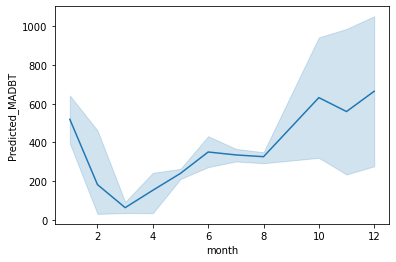

In [131]:
sns.lineplot(data=pred_save, x="month", y="Predicted_MADBT")

# Run Pedestrian RF model for iputation

# Apply Pedestrian RF Model